# Análisis Multivariado

In [4]:
#Importamos las librerias
# Operaciones Basicas
import numpy as np
import pandas as pd
import pandas_profiling

# Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Lectura del Dataframe
df = pd.read_csv('fraud_database.csv')
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape

(6362620, 11)

In [4]:
# Hacemos un value counts de los valores que presenta la variable objetivo en el dataset original
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [5]:
#Sacamos los porcentajes que presenta cada uno de los valores de la variable objetivo
df["isFraud"].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

0    99.87%
1     0.13%
Name: isFraud, dtype: object

In [6]:
#Tomamos una muestra aleatoria del Dataframe para poder trabajar mejor, ya que el original contiene demasiados datos y se dificulta el procesamiento
df1 = df.sample(n = 100000, random_state=41)
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4100544,301,CASH_OUT,158494.57,C619095003,9956.00,0.00,C2105073341,0.00,158494.57,0,0
923665,43,CASH_OUT,259718.34,C1082409361,0.00,0.00,C1590130481,277797.00,610210.58,0,0
3147959,236,CASH_OUT,427676.93,C1020603153,0.00,0.00,C501121600,474480.04,902156.96,0,0
2277814,187,CASH_IN,129704.14,C70650998,52051.00,181755.14,C1599108786,4465480.39,4335776.25,0,0
2227289,186,PAYMENT,17675.29,C24071061,225435.35,207760.06,M1661142592,0.00,0.00,0,0


In [7]:
#Para comenzar vemos el shape de nuestro Dataframe
df1.shape

(100000, 11)

In [8]:
#Buscamos un poco mas de informacion
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 4100544 to 3859526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 9.2+ MB


In [9]:
#Consultamos los tipos de variables que tenemos en nuestro Dataframe
df1.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
#Principales medidas estadísticas del dataframe mediante la función describe
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
step,100000.0,2.432345e+02,1.419824e+02,1.0,156.0000,239.000,3.340000e+02,7.430000e+02
amount,100000.0,1.775892e+05,5.691023e+05,0.3,13397.9525,75067.635,2.089757e+05,4.363841e+07
oldbalanceOrg,100000.0,8.488496e+05,2.918641e+06,0.0,0.0000,14138.000,1.079150e+05,3.537580e+07
newbalanceOrig,100000.0,8.703245e+05,2.955388e+06,0.0,0.0000,0.000,1.456181e+05,3.575571e+07
oldbalanceDest,100000.0,1.100081e+06,3.456142e+06,0.0,0.0000,134975.075,9.431508e+05,2.498603e+08
newbalanceDest,100000.0,1.223331e+06,3.727285e+06,0.0,0.0000,216991.950,1.118370e+06,2.519574e+08
isFraud,100000.0,1.200000e-03,3.462040e-02,0.0,0.0000,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,100000.0,0.000000e+00,0.000000e+00,0.0,0.0000,0.000,0.000000e+00,0.000000e+00


In [11]:
df1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Resumen de los datos:

Los datos son extraídos de una base de datos de transacciones financieras. Contamos con 6.362.620 observaciones y 11 variables. Reducimos el tamaño del dataset a 100.000 registros para simplificar el análisis. No contamos con datos nulos ni faltantes en este dataset.

In [12]:
# Hacemos un conteo de los valores que presenta nuestra variable target 'isFraud'
df1["isFraud"].value_counts()

0    99880
1      120
Name: isFraud, dtype: int64

In [13]:
# Confirmamos que la muestra es representativa ya que la variable objetivo contiene aproximadamente el mismo porcentaje de casos categorizados como isFraud
df1["isFraud"].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

0    99.88%
1     0.12%
Name: isFraud, dtype: object

In [14]:
# Hacemos un conteo de los diferentes tipos de transacciones que se presentan en la muestra
df1["type"].value_counts()

CASH_OUT    35227
PAYMENT     33673
CASH_IN     22000
TRANSFER     8418
DEBIT         682
Name: type, dtype: int64

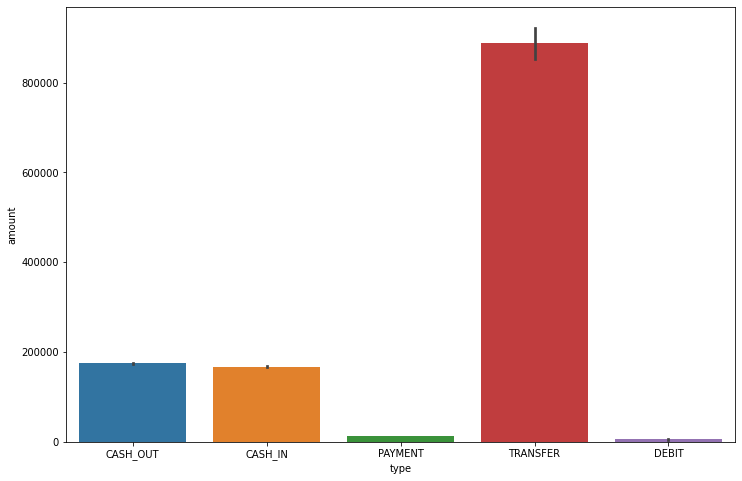

In [25]:
# Graficamos los diferentes tipos de transacciones y los montos de las mismas
plt.figure(figsize=(12,8))
sns.barplot(x="type", y='amount', data=df1)
plt.show()

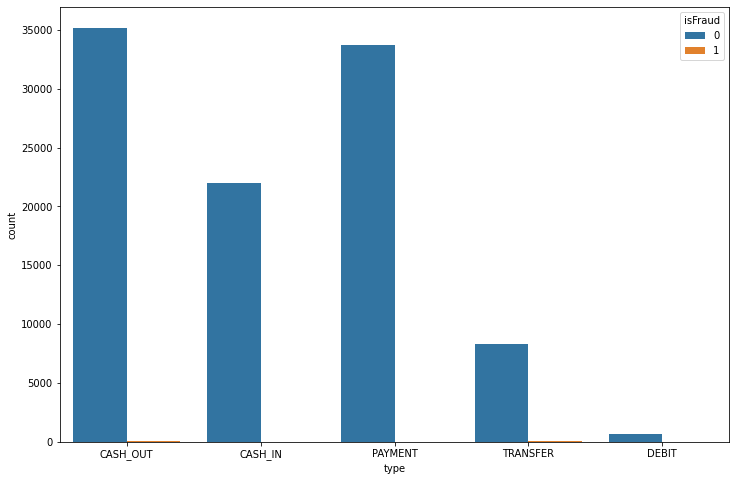

In [22]:
# Graficamos los diferentes tipos de transacciones, distinguendo los mismos por la variable target isFraud
plt.figure(figsize=(12,8))
sns.countplot(x="type", data=df1, hue="isFraud")
plt.show()

De acuerdo a lo observado en el gráfico, sólo tenemos registros categorizados como isFraud dentro de las operaciones Cash_Out y Transfer

In [27]:
#Como solamente tenemos categorizaciones de fraude en las operaciones de Cash_Out y Transfer, las filtramos
df1[df1["type"].isin(["CASH_OUT", "TRANSFER"]) & df1["isFraud"]==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1496069,142,TRANSFER,78810.30,C168746534,78810.30,0.0,C717942686,0.00,0.00,1,0
6194206,572,TRANSFER,161016.65,C1412560680,161016.65,0.0,C2103355598,0.00,0.00,1,0
6254815,597,CASH_OUT,1015051.70,C1574416258,1015051.70,0.0,C1664584911,267402.30,1282454.00,1,0
1030695,85,TRANSFER,4094.07,C810305173,4094.07,0.0,C600417404,0.00,0.00,1,0
1030467,66,TRANSFER,107188.41,C1876689114,107188.41,0.0,C1824138036,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4202746,305,CASH_OUT,2321633.57,C31072228,2321633.57,0.0,C2043561429,0.00,2321633.57,1,0
6061834,501,CASH_OUT,534470.98,C1832180008,534470.98,0.0,C1558734299,741.07,535212.06,1,0
6358071,713,CASH_OUT,108779.53,C522404571,108779.53,0.0,C71110217,0.00,108779.53,1,0
6281501,648,CASH_OUT,1086227.44,C1878954477,1086227.44,0.0,C1745741148,1017455.87,2103683.30,1,0


## Casos de destino (nameDest) con más de una transacción

In [61]:
df1[df1.duplicated(subset=['nameDest'],keep=False)].groupby('nameDest')['nameDest'].count().sort_values(ascending=False)

nameDest
C1116292004    5
C2123671396    5
C1286084959    5
C745740822     5
C1204684191    5
              ..
C167168722     2
C1671554064    2
C1671402595    2
C1671344361    2
C998930365     2
Name: nameDest, Length: 6257, dtype: int64

In [62]:
#NameDest con más de una transacción & isFraud = 1
df1[(df1.duplicated(subset=['nameDest'],keep=False))& df1["isFraud"]==1].groupby('nameDest')['nameDest'].count().sort_values(ascending=False)

nameDest
C1025108799    1
C1224081716    1
C1314676285    1
C149021692     1
C1502942700    1
C1596268050    1
C1600956649    1
C1984865103    1
C257156867     1
C276803409     1
C322369737     1
C362089456     1
C532302073     1
C71110217      1
C717942686     1
C979217194     1
Name: nameDest, dtype: int64

In [63]:
df1[df1["nameDest"]=="C1025108799"]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2925155,229,CASH_OUT,143332.00,C159990458,143332.0,0.0,C1025108799,482652.15,716367.34,1,0
5132942,356,CASH_OUT,125260.68,C173751330,0.0,0.0,C1025108799,1221396.62,1346657.30,0,0


Tenemos casos como este, donde el mismo destinatario realizó más de una operación. En el primer caso es un Cash Out por el total del saldo de la cuenta, se categoriza como fraude, lo que es correcto porque se vacía la cuenta. En el segundo caso, la cuenta no tiene fondos, de todas formas se transfiere el monto al destinatario pero no se categoriza como fraude, lo que no es correcto.

In [52]:
df1[df1["nameDest"]=="C717942686"]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1496069,142,TRANSFER,78810.30,C168746534,78810.30,0.0,C717942686,0.00,0.00,1,0
3778345,280,CASH_OUT,74356.99,C284185293,60431.31,0.0,C717942686,730597.79,804954.77,0,0


En este caso tenemos un mismo destinatario, al que le llegan dos transacciones, la primera es una transferencia en la cual la cuenta de origen queda sin saldo y se la categoriza como fraude. En el segundo caso, tenemos un cash out por un monto superior al saldo de la cuenta de origen y no se lo categoriza como fraude. 

In [64]:
#Ahora filtramos aquellos registros donde el monto de la transferencia es mayor o igual al saldo que tiene la cuenta de origen
df1[(df1["amount"]>=df1["oldbalanceOrg"])&(df1["type"].isin(["CASH_OUT", "TRANSFER"]))]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4100544,301,CASH_OUT,158494.57,C619095003,9956.0,0.0,C2105073341,0.00,158494.57,0,0
923665,43,CASH_OUT,259718.34,C1082409361,0.0,0.0,C1590130481,277797.00,610210.58,0,0
3147959,236,CASH_OUT,427676.93,C1020603153,0.0,0.0,C501121600,474480.04,902156.96,0,0
3723625,278,CASH_OUT,86393.18,C233412169,0.0,0.0,C1401810482,98269.21,184662.39,0,0
1164486,132,CASH_OUT,433012.06,C2052456501,32117.0,0.0,C242256411,0.00,433012.06,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1207067,133,CASH_OUT,341354.76,C2089164059,21698.0,0.0,C170533451,684474.15,1025828.90,0,0
875731,42,CASH_OUT,239519.47,C1574394927,41832.0,0.0,C1437375342,427509.37,667028.84,0,0
220139,14,CASH_OUT,179550.80,C1778328797,683.0,0.0,C1510291087,38224.27,217775.07,0,0
5602008,394,CASH_OUT,186315.19,C2134750135,0.0,0.0,C1298501371,439161.21,625476.41,0,0


In [66]:
df1[(df1["amount"]>=df1["oldbalanceOrg"]) & (df1["isFraud"]==1 ) &(df1["type"].isin(["CASH_OUT", "TRANSFER"]))]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1496069,142,TRANSFER,78810.30,C168746534,78810.30,0.0,C717942686,0.00,0.00,1,0
6194206,572,TRANSFER,161016.65,C1412560680,161016.65,0.0,C2103355598,0.00,0.00,1,0
6254815,597,CASH_OUT,1015051.70,C1574416258,1015051.70,0.0,C1664584911,267402.30,1282454.00,1,0
1030695,85,TRANSFER,4094.07,C810305173,4094.07,0.0,C600417404,0.00,0.00,1,0
1030467,66,TRANSFER,107188.41,C1876689114,107188.41,0.0,C1824138036,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4202746,305,CASH_OUT,2321633.57,C31072228,2321633.57,0.0,C2043561429,0.00,2321633.57,1,0
6061834,501,CASH_OUT,534470.98,C1832180008,534470.98,0.0,C1558734299,741.07,535212.06,1,0
6358071,713,CASH_OUT,108779.53,C522404571,108779.53,0.0,C71110217,0.00,108779.53,1,0
6281501,648,CASH_OUT,1086227.44,C1878954477,1086227.44,0.0,C1745741148,1017455.87,2103683.30,1,0


De los 39.311 casos donde el monto de la operación supera el saldo de la cuenta de origen, sólo 119 son categorizados como fraude.

# Análisis de correlación entre variables


Text(0.5, 1.0, 'Heatmap for the Dataset')

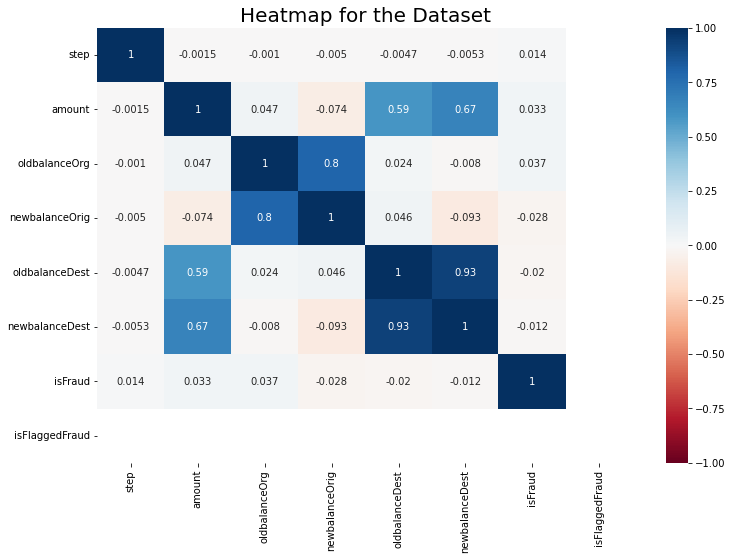

In [8]:
##Hagamos un HeatMap del df para ver si existe alguna correlación entre las variables
plt.figure(figsize=(12, 8))

correlacion = df1.corr(method='spearman')
sns.heatmap(correlacion, 
            xticklabels = correlacion.columns.values,
            yticklabels = correlacion.columns.values,
            annot = True, cmap='RdBu',vmin=-1,vmax=1);
plt.title('Heatmap for the Dataset', fontsize = 20)

Con respecto a la correlacion entre las variables, no encontramos nada relevante más allá de lo obvio, sólo podriamos destacar que oldbalance y newbalance (tanto de la cuenta de origen como la de destino) tienen relación con el monto, pero no en todos los casos.

<Figure size 720x480 with 0 Axes>

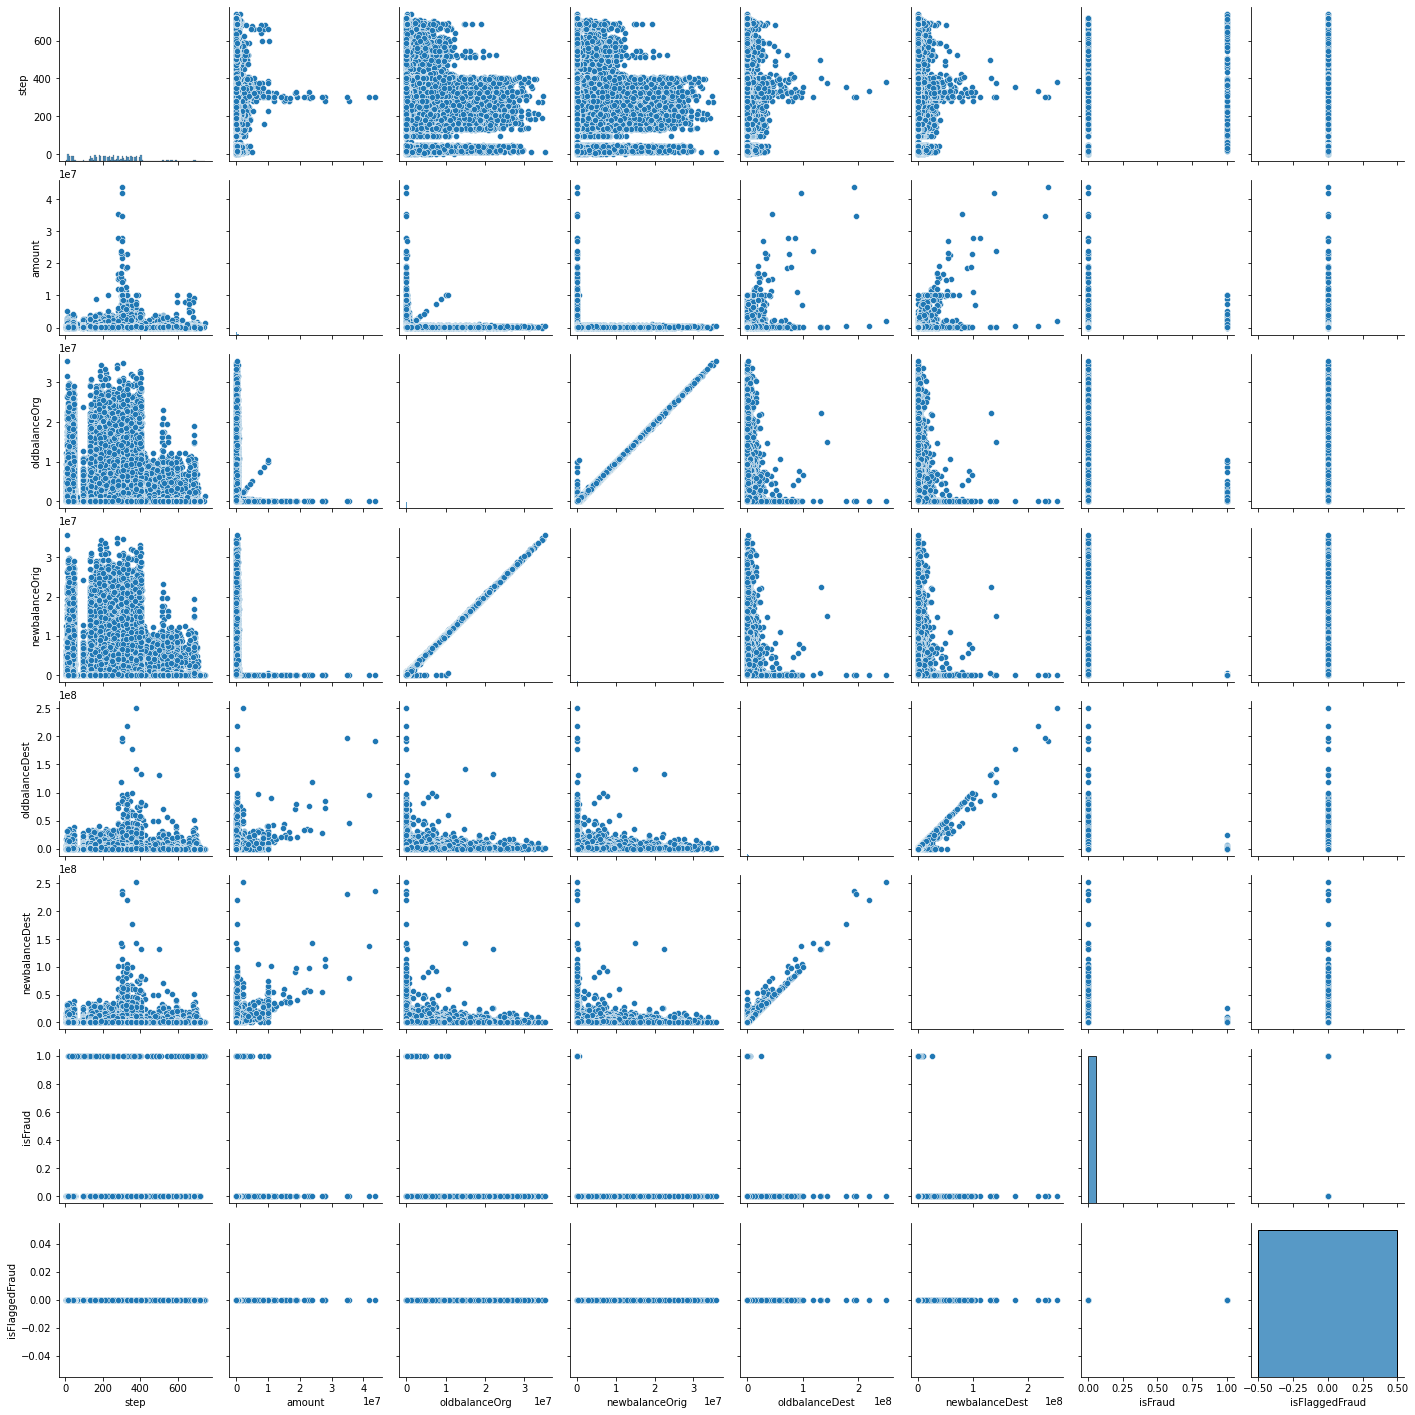

In [9]:
#Creamos un Pairplot del dataset
plt.figure(dpi=120)
sns.pairplot(df1)
plt.show()

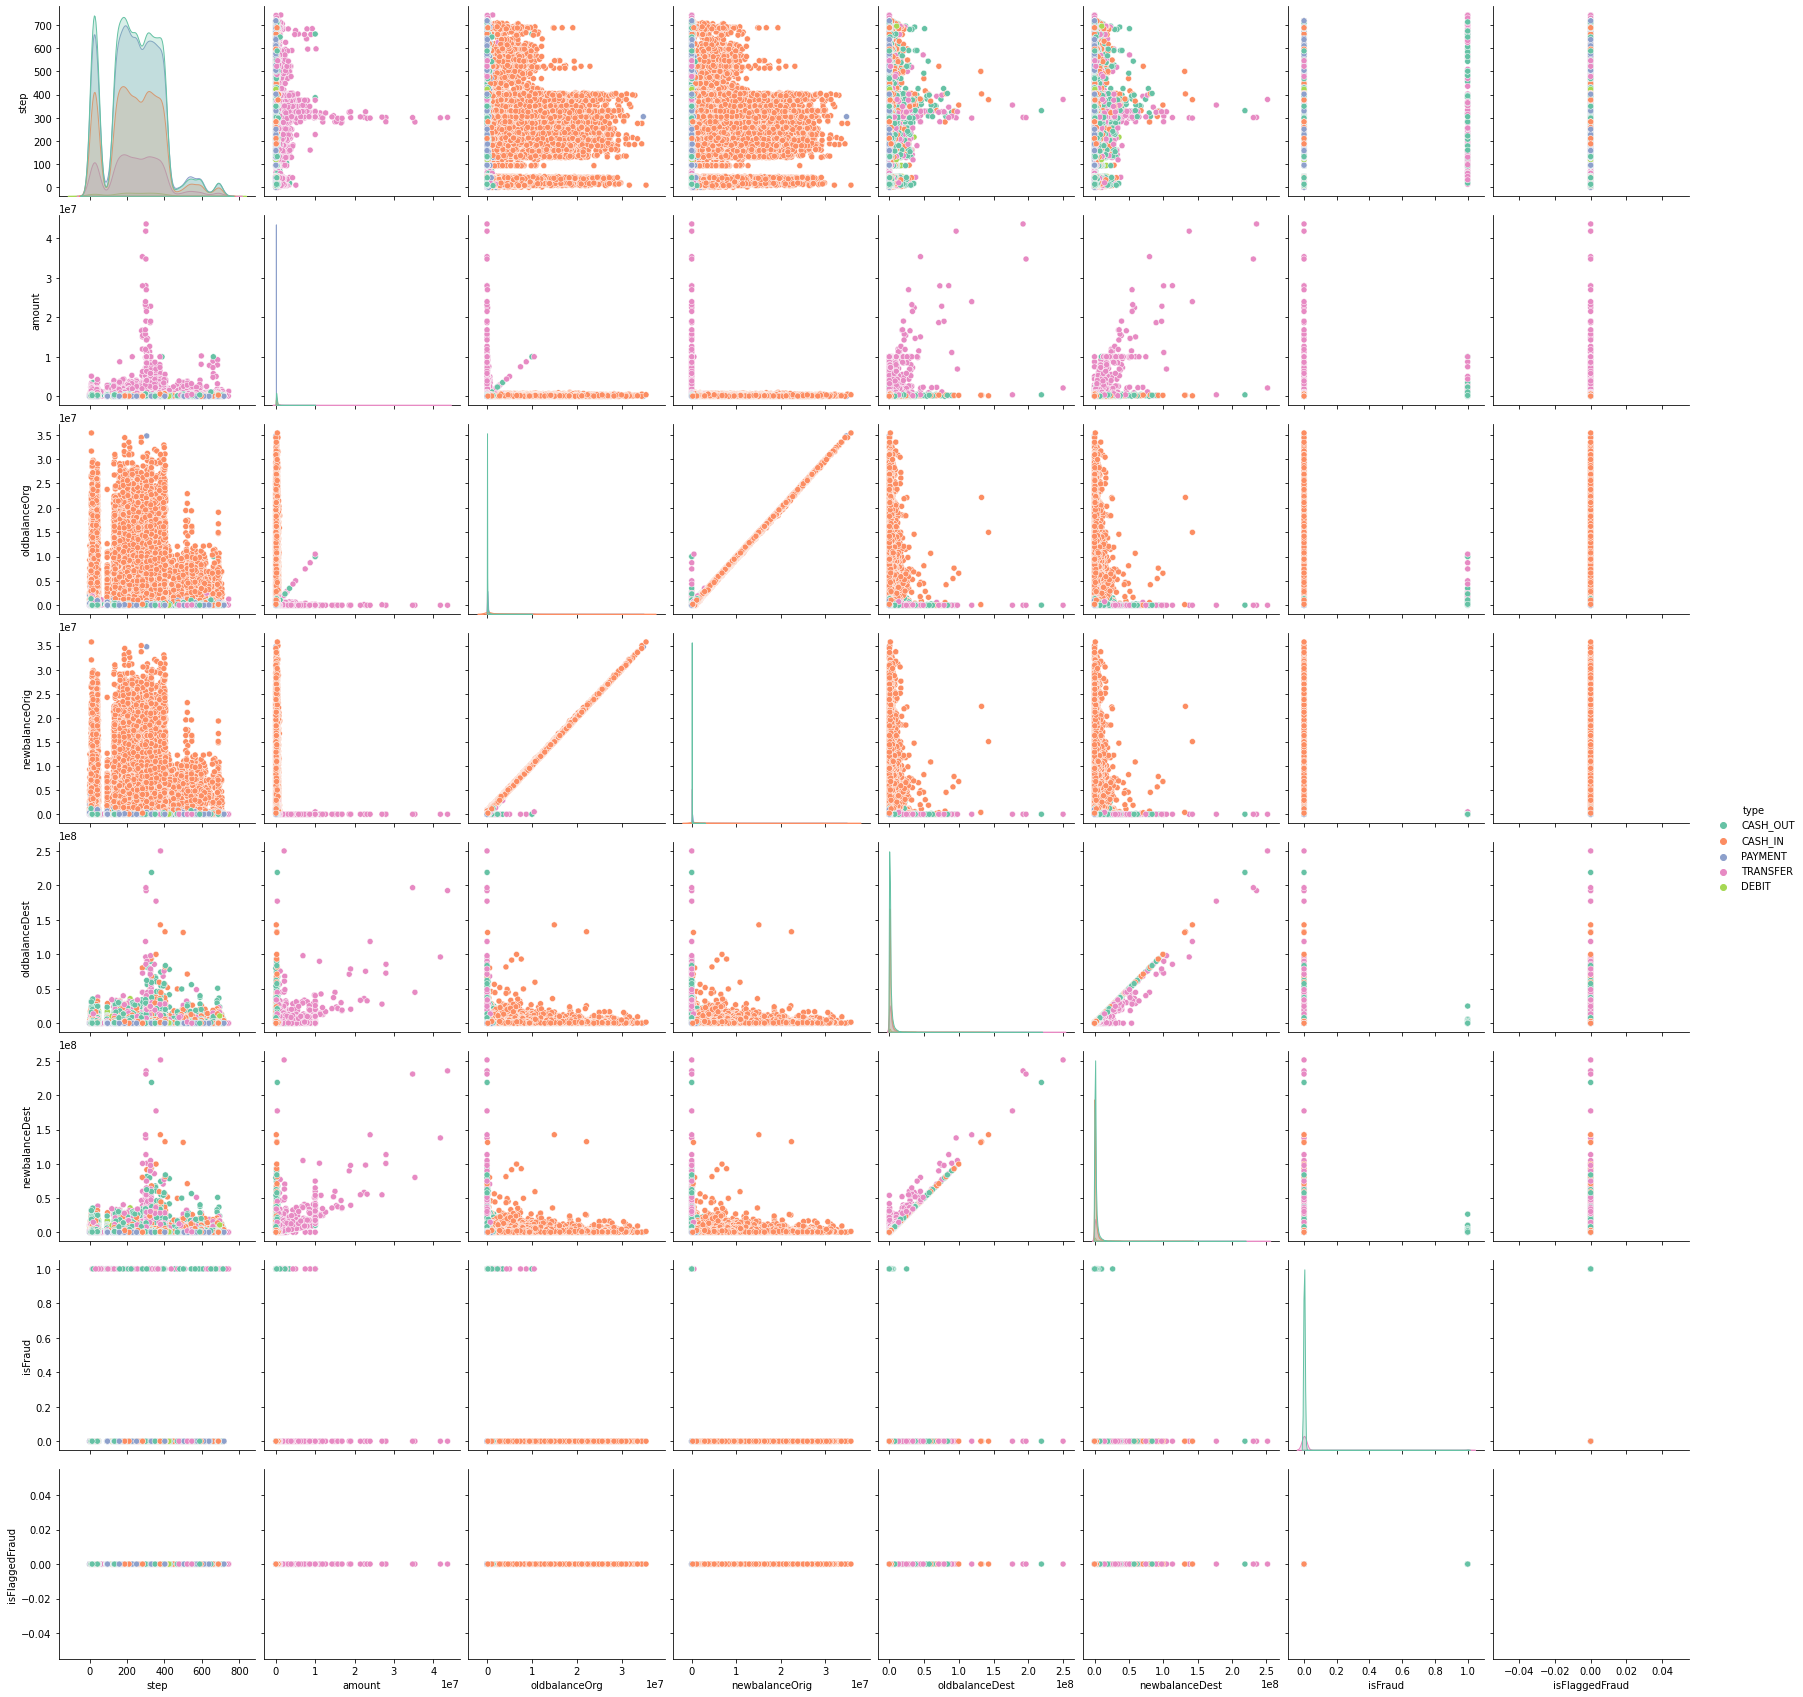

In [10]:
#Pairplot
sns.pairplot(df1,hue='type',height=3, palette='Set2')

In [12]:
#Reemplazar el 0 y 1 de la variable IsFraud
df1['isFraud'] = df1['isFraud'].map({1:'Is-Fraud', 0:'Non-Fraud'})
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4100544,301,CASH_OUT,158494.57,C619095003,9956.00,0.00,C2105073341,0.00,158494.57,Non-Fraud,0
923665,43,CASH_OUT,259718.34,C1082409361,0.00,0.00,C1590130481,277797.00,610210.58,Non-Fraud,0
3147959,236,CASH_OUT,427676.93,C1020603153,0.00,0.00,C501121600,474480.04,902156.96,Non-Fraud,0
2277814,187,CASH_IN,129704.14,C70650998,52051.00,181755.14,C1599108786,4465480.39,4335776.25,Non-Fraud,0
2227289,186,PAYMENT,17675.29,C24071061,225435.35,207760.06,M1661142592,0.00,0.00,Non-Fraud,0


<Figure size 720x480 with 0 Axes>

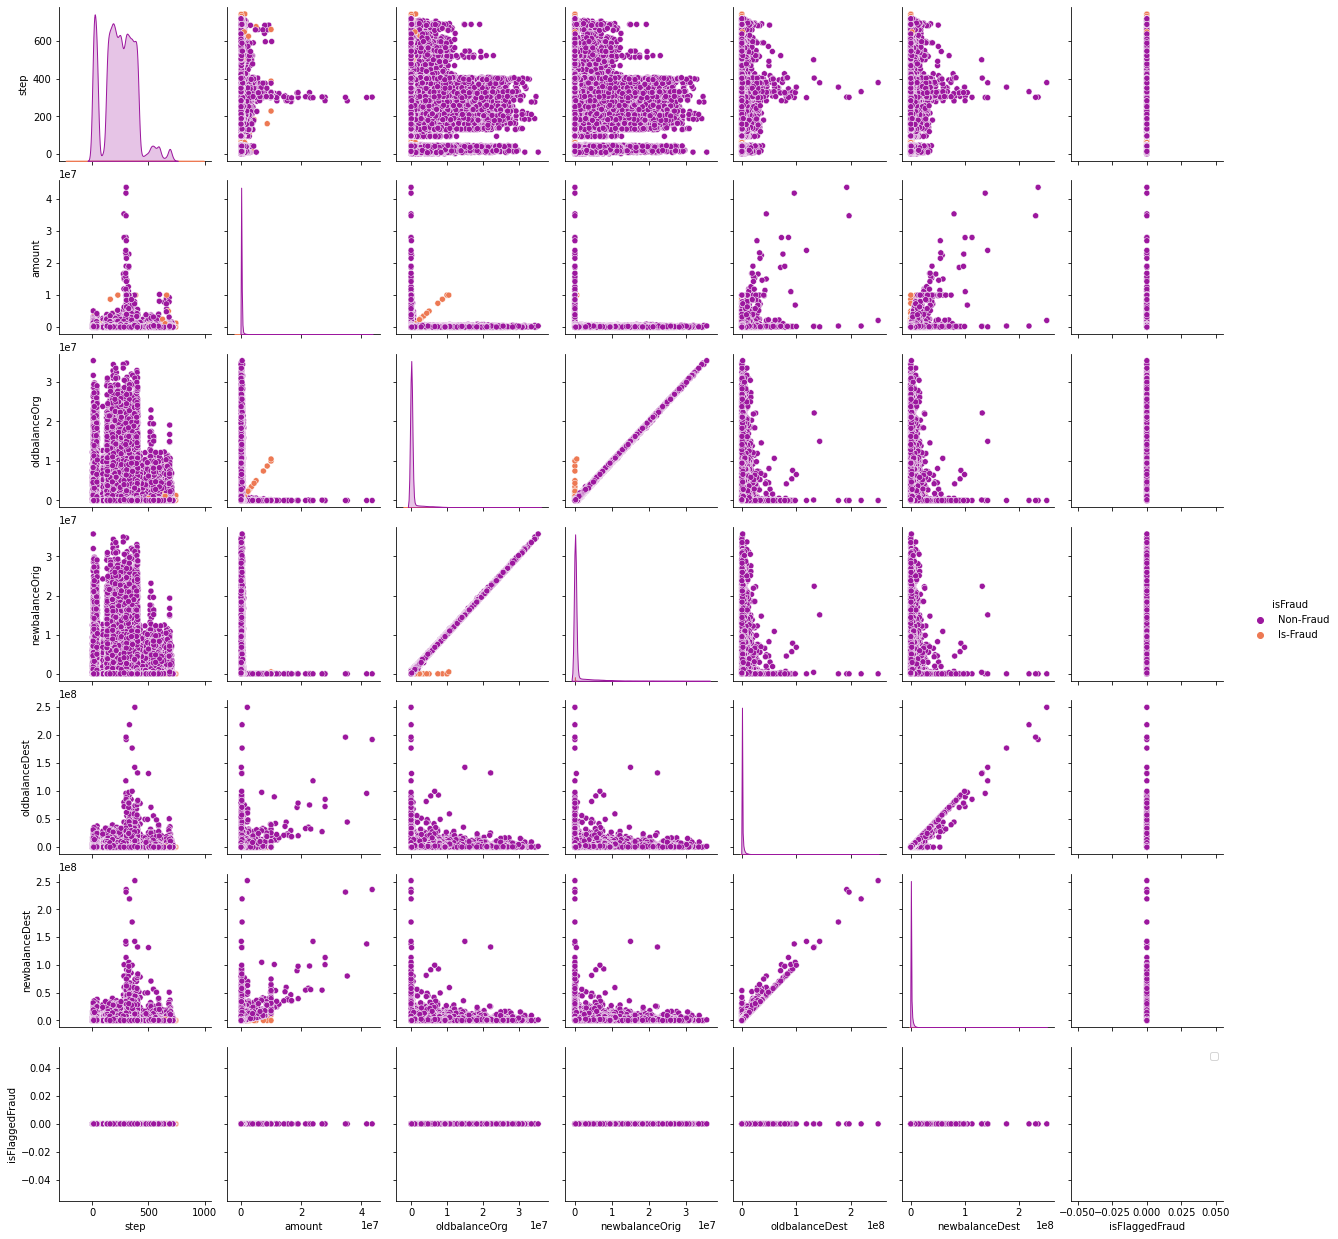

In [13]:
#Crear el Pairplot pero ahora con el atributo hue = 'isFraud'. Las leyendas deberán decir: 'Non Fraud','Fraud'
plt.figure(dpi = 120)
sns.pairplot(df1,hue = 'isFraud',palette = 'plasma')
plt.legend(['Non Fraud','Fraud'])
plt.show()

# Analisis de la variable isFlaggedFraud

- De acuerdo a la documentación, cuando la transferencia es superior a 200.000, se considera fraude, pero la definicion no se aplica en el dataset. Debemos eliminar la columna?

In [11]:
df1['isFlaggedFraud'].value_counts()

0    100000
Name: isFlaggedFraud, dtype: int64

In [15]:
df1[((df1["type"]=="TRANSFER") & (df1["amount"]>=200000)) ]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5598740,394,TRANSFER,1309451.75,C533862768,10909.00,0.0,C1369836261,298879.93,1608331.68,Non-Fraud,0
6079370,520,TRANSFER,462941.43,C1892034628,0.00,0.0,C2128447118,573144.53,1036085.96,Non-Fraud,0
1167239,132,TRANSFER,511905.29,C1157614359,0.00,0.0,C1477089094,3651473.24,4163378.53,Non-Fraud,0
2132981,183,TRANSFER,623767.30,C105717444,0.00,0.0,C1487000383,860953.25,1484720.55,Non-Fraud,0
294106,15,TRANSFER,2404849.32,C760566443,0.00,0.0,C8733802,2576060.12,4980909.45,Non-Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
2348514,189,TRANSFER,311116.29,C600670408,0.00,0.0,C1694833755,3306073.97,3617190.26,Non-Fraud,0
5444245,379,TRANSFER,439796.68,C1921444782,0.00,0.0,C1059939851,11212197.14,11651993.82,Non-Fraud,0
506975,20,TRANSFER,334036.43,C1951283044,725026.23,390989.8,C1288839332,13518078.84,14553964.95,Non-Fraud,0
3331307,253,TRANSFER,771625.18,C562764617,33518.02,0.0,C399083322,1104968.81,1876593.99,Non-Fraud,0


In [22]:
df1[((df1["type"]=="TRANSFER")& (df1["isFlaggedFraud"]==1 ) & (df1["amount"]>=200000)) ]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


# Analisis de outliers:

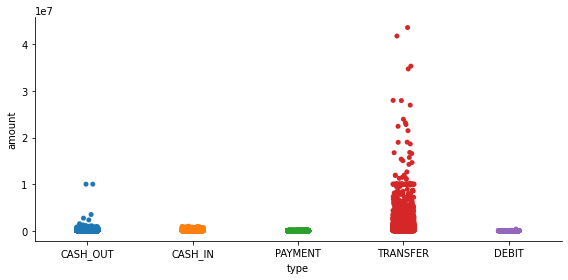

In [23]:
sns.catplot(data=df1, y='amount',
                x='type', height=4, aspect=2)
plt.show()

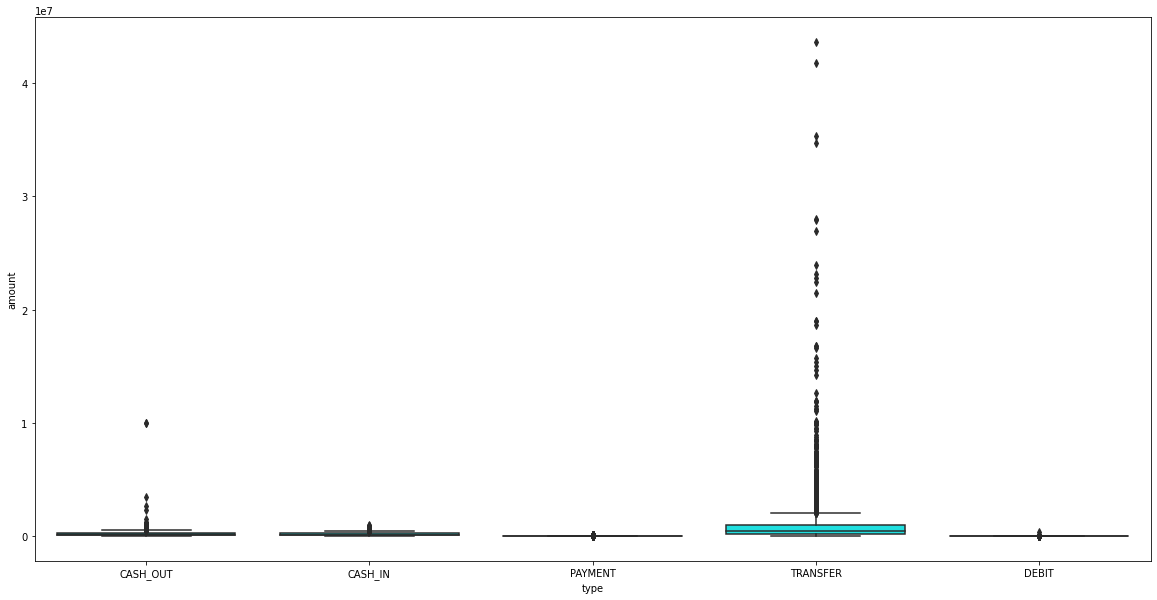

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df1,x='type',y='amount',palette=['#008B8B', '#00FFFF'])
plt.show()

In [26]:
df1.sort_values(by='amount', ascending=False).head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4111254,302,TRANSFER,43638406.64,C1701964888,0.00,0.0,C310383504,1.923071e+08,2.359455e+08,Non-Fraud,0
4061245,300,TRANSFER,41818052.20,C1011191693,0.00,0.0,C880754345,9.606096e+07,1.378790e+08,Non-Fraud,0
3827188,282,TRANSFER,35352166.34,C1998525990,0.00,0.0,C1595487508,4.483628e+07,8.009678e+07,Non-Fraud,0
4100256,301,TRANSFER,34759846.17,C170977668,0.00,0.0,C1320946922,1.965706e+08,2.313304e+08,Non-Fraud,0
4083111,301,TRANSFER,27994729.49,C1265692742,0.00,0.0,C84111522,8.546678e+07,1.134615e+08,Non-Fraud,0
3864642,283,TRANSFER,27962248.25,C598154353,0.00,0.0,C1602144022,7.261929e+07,1.005815e+08,Non-Fraud,0
4139112,303,TRANSFER,26973894.86,C1743697738,90132.73,0.0,C1805708874,2.769943e+07,5.467333e+07,Non-Fraud,0
4015350,299,TRANSFER,23955271.39,C2145557479,0.00,0.0,C1774146551,1.185184e+08,1.424736e+08,Non-Fraud,0
4002131,298,TRANSFER,23193004.01,C1311963329,0.00,0.0,C921293597,3.245097e+07,5.564398e+07,Non-Fraud,0
4527693,326,TRANSFER,22800768.50,C815272084,0.00,0.0,C1907159141,7.534602e+07,9.814679e+07,Non-Fraud,0


In [29]:
#Calculamos el quantil 0.99 para detectar dónde pueden surgir las anomalías en base al monto
q = df1['amount'].quantile(0.99)
q

1572388.2968999916

In [30]:
#Detectamos las anomalías que se presentan de acuerdo a los altos montos de las transferencias
anomalias = df1[df1['amount'] > q ]
anomalias

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
294106,15,TRANSFER,2404849.32,C760566443,0.0,0.0,C8733802,2576060.12,4980909.45,Non-Fraud,0
5686247,397,TRANSFER,1620540.28,C676158683,737.0,0.0,C458907568,0.00,1620540.28,Non-Fraud,0
5385622,376,TRANSFER,3412224.31,C742571168,12221.0,0.0,C759525800,1579136.62,4991360.93,Non-Fraud,0
4844564,347,TRANSFER,2334780.14,C747852787,119.0,0.0,C2040019202,0.00,2334780.14,Non-Fraud,0
464289,19,TRANSFER,1677853.18,C145967832,0.0,0.0,C1304776965,2642182.32,4590727.47,Non-Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
2886811,228,TRANSFER,1879720.15,C1793505619,88195.0,0.0,C707993034,0.00,1879720.15,Non-Fraud,0
6136583,544,TRANSFER,3182640.68,C1252317635,6574.0,0.0,C1995497838,320072.99,3502713.67,Non-Fraud,0
6037348,478,TRANSFER,3866488.86,C2075239135,18853.5,0.0,C1704676936,8411599.07,12278087.92,Non-Fraud,0
4908314,349,TRANSFER,8615198.31,C1733219849,0.0,0.0,C1014935920,19025668.78,27640867.09,Non-Fraud,0


In [32]:
#Filtramos las anomalias detectadas que son fraude para ver la importancia de las mismas
anomalias[anomalias.isFraud == 'Is-Fraud']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6020336,463,TRANSFER,1968008.53,C1548769886,1968008.53,0.00,C1779956771,0.00,0.00,Is-Fraud,0
6296662,676,TRANSFER,5016884.33,C60690342,5016884.33,0.00,C1327214337,0.00,0.00,Is-Fraud,0
1059597,106,CASH_OUT,2708906.59,C1012201968,2708906.59,0.00,C1330533329,0.00,2708906.59,Is-Fraud,0
5563706,387,CASH_OUT,10000000.00,C618976547,10000000.00,0.00,C1908782637,0.00,10000000.00,Is-Fraud,0
2900070,228,TRANSFER,2874626.02,C1926697362,2874626.02,0.00,C443920202,0.00,0.00,Is-Fraud,0
3950448,287,TRANSFER,1796406.60,C895738872,1796406.60,0.00,C1872912414,0.00,0.00,Is-Fraud,0
1059662,115,TRANSFER,1844357.26,C1543576546,1844357.26,0.00,C1140609516,0.00,0.00,Is-Fraud,0
1741554,161,TRANSFER,8720558.46,C582011779,8720558.46,0.00,C1801176562,0.00,0.00,Is-Fraud,0
6290958,661,CASH_OUT,10000000.00,C2037423136,10000000.00,0.00,C1464217009,110409.52,10110409.52,Is-Fraud,0
474967,19,CASH_OUT,3477438.49,C841995363,3477438.49,0.00,C1314676285,0.00,3477438.49,Is-Fraud,0


In [33]:
#Eliminamos los outliers para poder graficar el tipo de transacción vs el monto de una manera más visible y que el gráfico no resulte sesgado
sin_outliers = df1.drop(df1.index[df1['amount'] > q])

In [34]:
sin_outliers.sort_values(by='amount', ascending=False).head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5828255,402,TRANSFER,1572371.87,C1693312394,0.00,0.0,C2122159800,1614032.78,3186404.65,Non-Fraud,0
2741192,212,TRANSFER,1571869.18,C328045296,0.00,0.0,C2129039960,7942462.01,9514331.19,Non-Fraud,0
1915354,166,TRANSFER,1570536.50,C775150565,0.00,0.0,C641803839,3245034.90,4815571.40,Non-Fraud,0
5684783,397,TRANSFER,1570139.19,C1000114621,3440.00,0.0,C1851134961,0.00,1570139.19,Non-Fraud,0
5300888,373,TRANSFER,1569498.03,C1366109747,11631.00,0.0,C1621453327,685833.81,2255331.84,Non-Fraud,0
4930007,350,TRANSFER,1567435.42,C794825498,0.00,0.0,C1684494951,8961510.85,10528946.27,Non-Fraud,0
3015905,232,TRANSFER,1566147.28,C862567148,31205.00,0.0,C1279827158,0.00,1566147.28,Non-Fraud,0
4580892,328,TRANSFER,1566064.80,C197387666,30742.61,0.0,C2042515866,12544040.07,14110104.87,Non-Fraud,0
3441689,257,TRANSFER,1564717.36,C193308279,0.00,0.0,C1527418896,1769039.30,3333756.66,Non-Fraud,0
3103745,235,TRANSFER,1564663.72,C403567330,413258.00,0.0,C1571474009,0.00,1564663.72,Non-Fraud,0


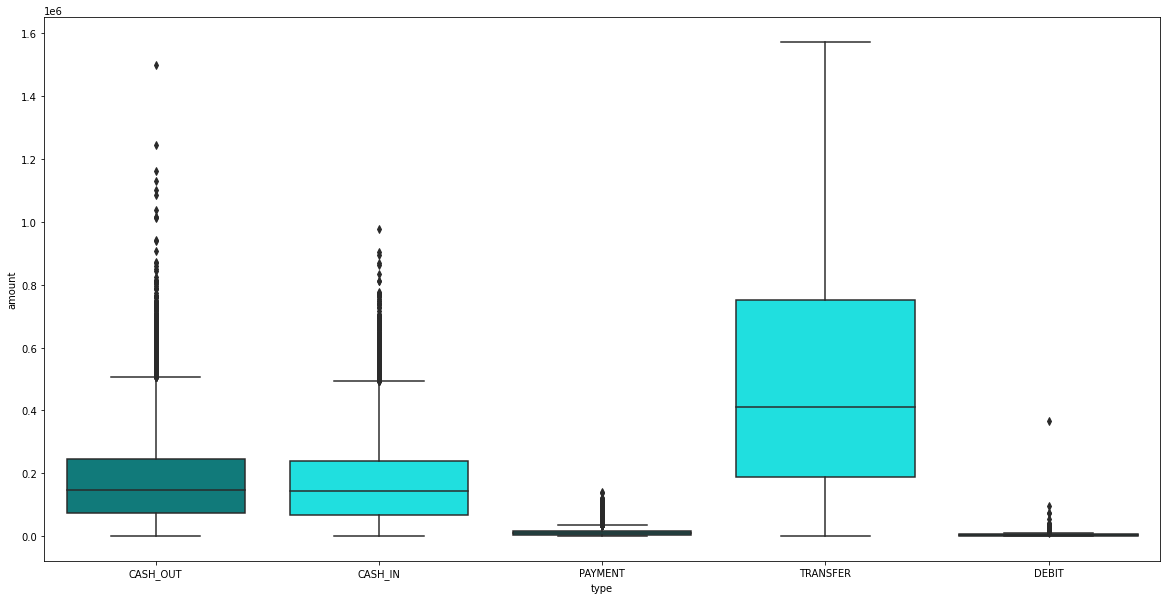

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(data=sin_outliers,x='type',y='amount',palette=['#008B8B', '#00FFFF'])
plt.show()

In [38]:
sin_outliers[sin_outliers.type == "TRANSFER"].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,7423.000000,7.423000e+03,7.423000e+03,7.423000e+03,7.423000e+03,7.423000e+03,7423.0
mean,240.396740,5.049321e+05,4.522693e+04,9.878924e+03,2.010746e+06,2.534063e+06,0.0
std,145.175071,3.860360e+05,1.387078e+05,8.489792e+04,4.171247e+06,4.243956e+06,0.0
min,1.000000,2.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,153.000000,1.894200e+05,0.000000e+00,0.000000e+00,2.042130e+05,6.685604e+05,0.0
50%,234.000000,4.099362e+05,0.000000e+00,0.000000e+00,9.030645e+05,1.434559e+06,0.0
75%,332.000000,7.514413e+05,2.798996e+04,0.000000e+00,2.257926e+06,2.965678e+06,0.0
max,743.000000,1.572372e+06,3.491719e+06,2.865538e+06,1.770368e+08,1.773964e+08,0.0
